In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [4]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [5]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [56]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    
    N = y.shape[0]
    e = y - tx.dot(w)
    
    # MSE
    # l = 1/(2*N) * e.dot(e)
    
    # MAE
    l = np.abs(e).sum() / N
    
    return l

In [57]:
w = np.array([1, 2])
l = compute_loss(y, tx, w)

In [58]:
print(l)

73.06780585492638


# 2 Grid Search

Fill in the function `grid_search()` below:

In [9]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    #raise NotImplementedError
    
    for i in range(len(w0)): 
        for j in range(len(w1)):    
            w = np.array([w0[i], w1[j]])
            losses[i,j] = compute_loss(y, tx, w)
    
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678249, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.005 seconds


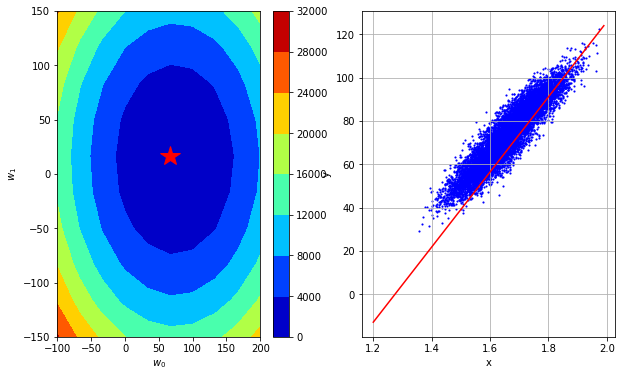

In [10]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [60]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient
    # ***************************************************
    N = y.shape[0]
    e = y - tx.dot(w)
    
    # gradient for MSE
    #return -1/N * (tx.T.dot(e))
    
    # gradient for MAE
    return np.array([np.sign(w[0]), \
                     1/N * (-np.sign(e)) * np.sum(tx[:,1])])

Please fill in the functions `gradient_descent` below:

In [61]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        gradient = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
        
        #update w by gradient
        w = w - gamma * gradient

        
    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [62]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.1

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))


ValueError: setting an array element with a sequence.

In [19]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=101, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [22]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    N = y.shape[0]
    e = y - tx.dot(w)
    return -1/N * (tx.T.dot(e))


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            gradient = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
            loss = compute_loss(y, tx, w)

            # store w and loss
            ws.append(w)
            losses.append(loss)
            print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
                  bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

            #update w by gradient
            w = w - gamma * gradient
    
    return losses, ws

In [25]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=2792.236712759167, w0=0, w1=0
Stochastic Gradient Descent(1/49): loss=2208.6971472296477, w0=7.720110194693037, w1=4.1685511879837565
Stochastic Gradient Descent(2/49): loss=1865.781427842955, w0=13.556562320162252, w1=1.980193393810382
Stochastic Gradient Descent(3/49): loss=1685.8666873858426, w0=18.14536853192049, w1=-3.829205762870917
Stochastic Gradient Descent(4/49): loss=1495.353830205612, w0=22.335491151420285, w1=-5.577417724337988
Stochastic Gradient Descent(5/49): loss=1084.4444134303653, w0=29.074376826227464, w1=-0.038751810685521804
Stochastic Gradient Descent(6/49): loss=862.2985697852702, w0=34.37381193459605, w1=0.09874101412963124
Stochastic Gradient Descent(7/49): loss=860.6360118030178, w0=34.774308769539644, w1=-0.8987313014498579
Stochastic Gradient Descent(8/49): loss=505.0747226581694, w0=42.306218338922456, w1=17.854628578351225
Stochastic Gradient Descent(9/49): loss=413.7465013857091, w0=45.953417197238146, w1=20.495268

In [24]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=101, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

In [33]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

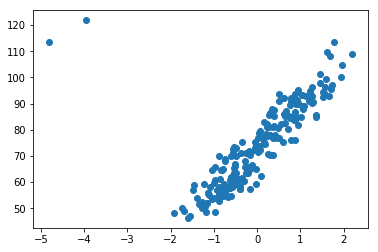

In [39]:
plt.scatter(x, y)

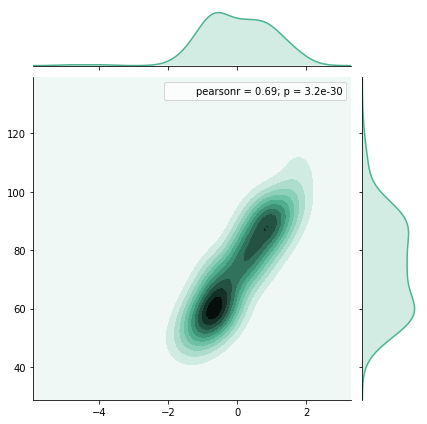

In [42]:
import seaborn as sns

sns.jointplot(x, y, kind='kde',  color="#4CB391")

#### Using GD on outliers

In [37]:
# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.1

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))


Gradient Descent(0/99): loss=2869.8351145358524, w0=0, w1=0
Gradient Descent(1/99): loss=2337.0932814935354, w0=7.4067805854926325, w1=1.103489486598917
Gradient Descent(2/99): loss=1905.5723967292581, w0=14.072883112436008, w1=2.0966300245379443
Gradient Descent(3/99): loss=1556.0404800701936, w0=20.07237538668505, w1=2.9904565086830646
Gradient Descent(4/99): loss=1272.9196275763513, w0=25.47191843350918, w1=3.7949003444136746
Gradient Descent(5/99): loss=1043.5917370563393, w0=30.3315071756509, w1=4.5188997965712225
Gradient Descent(6/99): loss=857.8361457351294, w0=34.705137043578446, w1=5.170499303513015
Gradient Descent(7/99): loss=707.3741167649493, w0=38.64140392471324, w1=5.756938859760628
Gradient Descent(8/99): loss=585.4998732991036, w0=42.18404411773455, w1=6.28473446038348
Gradient Descent(9/99): loss=486.7817360917687, w0=45.37242029145373, w1=6.759750500944047
Gradient Descent(10/99): loss=406.82004495382716, w0=48.241958847800994, w1=7.187264937448555
Gradient Descent(

In [38]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=101, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

#### Using SGD on outliers

In [35]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=2869.8351145358524, w0=0, w1=0
Stochastic Gradient Descent(1/49): loss=2525.377458726448, w0=5.831703071146186, w1=-5.173983384188288
Stochastic Gradient Descent(2/49): loss=2292.35826549954, w0=10.316852898359654, w1=-8.67984753464824
Stochastic Gradient Descent(3/49): loss=1607.6787356651892, w0=19.619292961281044, w1=0.13280998300874458
Stochastic Gradient Descent(4/49): loss=1198.6978437819246, w0=27.026643470288153, w1=3.7779486169983785
Stochastic Gradient Descent(5/49): loss=900.7259665287942, w0=33.37296468676531, w1=14.711901141551584
Stochastic Gradient Descent(6/49): loss=776.14987680975, w0=38.385023855854605, w1=23.166562608761097
Stochastic Gradient Descent(7/49): loss=692.8053441967922, w0=40.662927631340956, w1=22.77641687362542
Stochastic Gradient Descent(8/49): loss=583.617201207604, w0=43.79895207042844, w1=21.951370157157385
Stochastic Gradient Descent(9/49): loss=506.8117482939797, w0=46.250218767813735, w1=21.424499528037494

In [36]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=101, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function